In [53]:
import pandas as pd
import matplotlib.pyplot as plt

In [54]:
grant_df = pd.read_csv('data/grant_df.csv')
carbon_years = pd.read_csv('data/carbon_years.csv')
NRI_df = pd.read_csv('data/NRI_Table_Counties.csv')
NRI_dict_df = pd.read_csv('data/NRIDataDictionary.csv')
state_map = pd.read_csv('data/states.csv')

In [55]:
grant_df.info()

grant_df = grant_df[grant_df["COMPLETED_DT"].notna()]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 337037 entries, 0 to 337036
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   X                 337037 non-null  float64
 1   Y                 337037 non-null  float64
 2   OBJECTID          337037 non-null  int64  
 3   ID                337037 non-null  float64
 4   GRANTEE           337037 non-null  object 
 5   GRANTEE_TYPE      335838 non-null  float64
 6   GRANTEE_ID        336551 non-null  float64
 7   IDIS_ACTV_ID      337037 non-null  int64  
 8   ADDRESS           337037 non-null  object 
 9   CITY              337037 non-null  object 
 10  STATE             337037 non-null  object 
 11  ZIP               337037 non-null  int64  
 12  LAT               337037 non-null  float64
 13  LON               337037 non-null  float64
 14  GROUPING          337037 non-null  object 
 15  NAME              337037 non-null  object 
 16  ALIAS             28

In [56]:
grant_df["COMPLETED_DT"] = pd.to_datetime(grant_df["COMPLETED_DT"], errors = 'coerce')

In [57]:
grant_df = grant_df[grant_df["COMPLETED_DT"].notna()]

In [58]:
grant_df["completed_year"] = grant_df["COMPLETED_DT"].dt.year

In [59]:
grant_df_2015 = grant_df[grant_df["completed_year"]>2015]

In [60]:
grant_df_2015.columns

Index(['X', 'Y', 'OBJECTID', 'ID', 'GRANTEE', 'GRANTEE_TYPE', 'GRANTEE_ID',
       'IDIS_ACTV_ID', 'ADDRESS', 'CITY', 'STATE', 'ZIP', 'LAT', 'LON',
       'GROUPING', 'NAME', 'ALIAS', 'ACTV_FUNDING_AMT', 'COMPLETED_DT',
       'ID_CHAR', 'completed_year'],
      dtype='object')

In [61]:
grant_df_2015_grouped = grant_df_2015.groupby(["LAT", "LON", "STATE"]).sum()[["ACTV_FUNDING_AMT"]].reset_index()

/tmp/ipykernel_4431/799990792.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grant_df_2015_grouped = grant_df_2015.groupby(["LAT", "LON", "STATE"]).sum()[["ACTV_FUNDING_AMT"]].reset_index()


In [62]:
grant_df_2015.groupby(["LAT", "LON", "STATE", "GROUPING"]).sum()[["ACTV_FUNDING_AMT"]]

/tmp/ipykernel_4431/1707397966.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grant_df_2015.groupby(["LAT", "LON", "STATE", "GROUPING"]).sum()[["ACTV_FUNDING_AMT"]]


ACTV_FUNDING_AMT
LAT       LON         STATE GROUPING                             
13.442948 -144.769809 GU    Public Services              57131.69
17.764585 -64.788143  VI    Public Services              62000.00
18.010491 -66.609081  PR    Public Services              44148.22
          -66.608908  PR    Public Services              84883.44
18.017060 -66.619135  PR    Public Services             120406.50
...                                                           ...
61.219329 -149.745080 AK    Housing                     400798.13
61.219502 -149.859444 AK    Public Improvements          70888.39
61.219527 -149.746084 AK    Housing                         90.00
61.219536 -149.864502 AK    Public Improvements         109550.00
64.754761 -147.350786 AK    Public Improvements         717133.09

[35375 rows x 1 columns]

In [63]:
carbon_years[">2015"]= carbon_years["2016"] + carbon_years["2017"] + carbon_years["2018"] + carbon_years["2019"] + carbon_years["2020"] + carbon_years["2021"]

carbon_years[">2015"] = carbon_years[">2015"]/6


In [64]:
carbon_years_2015_grouped = carbon_years.groupby("State").sum()[[">2015"]].reset_index()

In [66]:
state_map = state_map[["State", "Postal"]].set_index("State").to_dict()

In [67]:
carbon_years_2015_grouped.replace(state_map["Postal"], inplace=True)


In [68]:
carbon_grant_df = grant_df_2015_grouped.merge(carbon_years_2015_grouped, left_on="STATE", right_on="State")

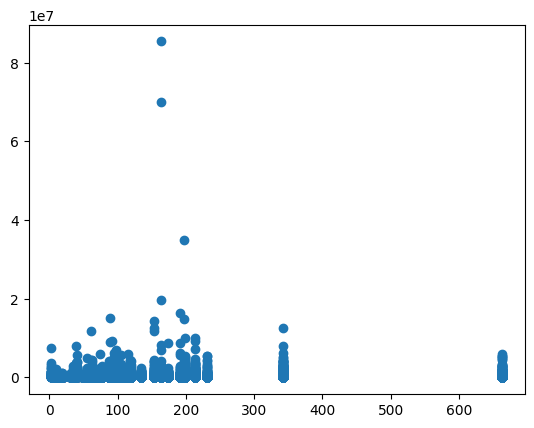

In [75]:
carbon_grant_df = carbon_grant_df[["STATE", "ACTV_FUNDING_AMT",  '>2015']]


In [81]:
carbon_grant_df

,STATE,ACTV_FUNDING_AMT,>2015
0,HI,1218197.31,18.866667
1,HI,431802.69,18.866667
2,HI,47000.00,18.866667
3,HI,526478.00,18.866667
4,HI,246500.00,18.866667
...,...,...,...
32452,AK,400798.13,35.133333
32453,AK,70888.39,35.133333
32454,AK,90.00,35.133333
32455,AK,109550.00,35.133333


In [83]:
carbon_grant_df = carbon_grant_df.groupby("STATE").sum()[["ACTV_FUNDING_AMT", ">2015"]]

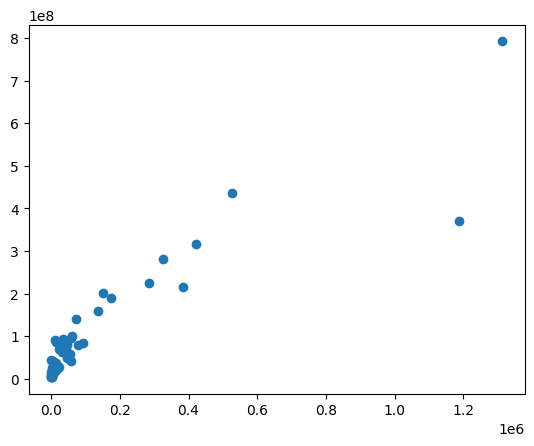

In [84]:
plt.scatter(data=carbon_grant_df, y='ACTV_FUNDING_AMT', x=">2015")

In [88]:
carbon_grant_df.sort_values(">2015")

,ACTV_FUNDING_AMT,>2015
STATE,,
DC,4.316680e+07,1.413333e+02
VT,1.209130e+07,3.171667e+02
AK,4.894987e+06,5.972667e+02
SD,7.532131e+06,6.080000e+02
HI,1.658090e+07,8.678667e+02
DE,3.491852e+06,1.138200e+03
MT,9.303921e+06,1.597067e+03
NE,4.751429e+06,1.708583e+03
WY,3.523040e+06,1.845533e+03


There is a positive correlation between government funding and amount of carbon dioxide 

In [105]:
NRI_df

,OID_,NRI_ID,STATE,STATEABBRV,STATEFIPS,COUNTY,COUNTYTYPE,COUNTYFIPS,STCOFIPS,POPULATION,...,WNTW_EALS,WNTW_EALR,WNTW_ALRB,WNTW_ALRP,WNTW_ALRA,WNTW_ALR_NPCTL,WNTW_RISKV,WNTW_RISKS,WNTW_RISKR,NRI_VER
0,1,C01001,Alabama,AL,1,Autauga,County,1,1001,58764,...,15.784587,Very Low,2.687716e-07,7.410082e-09,8.725777e-06,10.461158,8494.906508,12.217626,Very Low,March 2023
1,2,C01003,Alabama,AL,1,Baldwin,County,3,1003,231365,...,56.205509,Relatively Moderate,1.268231e-09,2.287120e-08,1.548360e-07,13.339523,65619.701638,52.083996,Relatively Low,March 2023
2,3,C01005,Alabama,AL,1,Barbour,County,5,1005,25160,...,18.632002,Relatively Low,5.788050e-07,2.347236e-08,7.606598e-07,16.125039,15501.730335,19.535476,Very Low,March 2023
3,4,C01007,Alabama,AL,1,Bibb,County,7,1007,22239,...,13.308573,Very Low,9.014679e-07,1.270300e-08,1.202015e-05,16.991643,7496.186940,11.104041,Very Low,March 2023
4,5,C01009,Alabama,AL,1,Blount,County,9,1009,58992,...,23.645930,Relatively Low,5.268425e-07,1.482016e-08,2.002965e-07,12.039616,17175.160729,21.444480,Very Low,March 2023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3226,3227,C72151,Puerto Rico,PR,72,Yabucoa,Municipio,151,72151,30397,...,0.000000,No Expected Annual Losses,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,NaN,NaN,Insufficient Data,March 2023
3227,3228,C72153,Puerto Rico,PR,72,Yauco,Municipio,153,72153,34151,...,0.000000,No Expected Annual Losses,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,NaN,NaN,Insufficient Data,March 2023
3228,3229,C78010,Virgin Islands,VI,78,St. Croix,Island,10,78010,40913,...,0.000000,No Expected Annual Losses,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,NaN,NaN,Insufficient Data,March 2023
3229,3230,C78020,Virgin Islands,VI,78,St. John,Island,20,78020,3882,...,0.000000,No Expected Annual Losses,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,NaN,NaN,Insufficient Data,March 2023


In [112]:
NRI_df["STATE"].replace(state_map["Postal"], inplace=True)

In [120]:
NRI_df_grouped = NRI_df.groupby("STATE").mean("RISK_SCORE")[["RISK_SCORE"]].reset_index()

In [122]:
carbon_grant_nri_df = carbon_grant_df.merge(NRI_df_grouped, on="STATE")

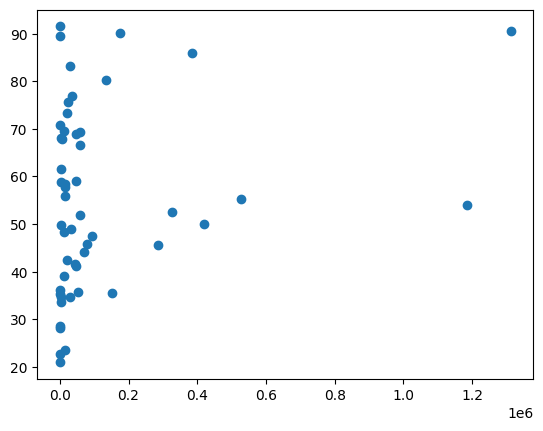

In [132]:
plt.scatter(data=carbon_grant_nri_df,x=">2015", y="RISK_SCORE")

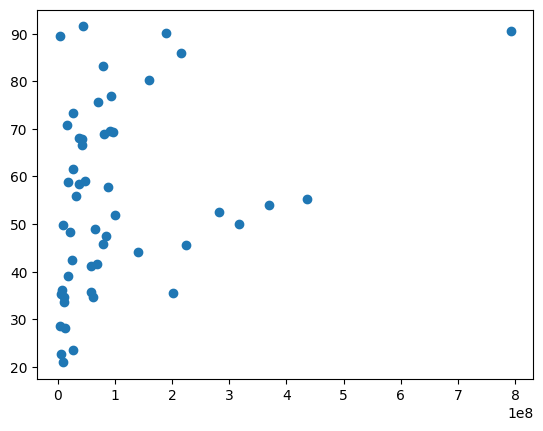

In [133]:
plt.scatter(data=carbon_grant_nri_df,x="ACTV_FUNDING_AMT", y="RISK_SCORE")